## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [1]:
!head Data/countries_info.csv

country_name,area,population,literacy
afghanistan,647500,31056997,"36,0"
albania,28748,3581655,"86,5"
algeria,2381740,32930091,"70,0"
argentina,2766890,39921833,"97,1"
armenia,29800,2976372,"98,6"
australia,7686850,20264082,"100,0"
austria,83870,8192880,"98,0"
azerbaijan,86600,7961619,"97,0"
bahrain,665,698585,"89,1"


In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.pkl"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [3]:
happiness=pd.read_pickle(HAPPINESS_DATASET)
countries=pd.read_csv(COUNTRIES_DATASET, sep=',')

In [4]:
happiness.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


In [5]:
countries.head()

,country_name,area,population,literacy
0,afghanistan,647500,31056997,"36,0"
1,albania,28748,3581655,"86,5"
2,algeria,2381740,32930091,"70,0"
3,argentina,2766890,39921833,"97,1"
4,armenia,29800,2976372,"98,6"


The dataframes are looking good, they have the expected format

## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify to have all the rows in the final dataframe

In [6]:
countries = countries.rename(columns={'country_name': 'country'})

In [7]:
happiness['country']=happiness['country'].str.title()
countries['country']=countries['country'].str.title()

In [8]:
merged=pd.merge(happiness,countries)

## Task 3: Where do people are happier?

Print the top 10 countries based on their happiness score (high is better).

In [9]:
happy_countries=merged.nlargest(10,['happiness_score'])['country']
happy_countries.index=np.arange(1, 11)
print(happy_countries)

1         Finland
2         Denmark
3     Switzerland
4         Iceland
5          Norway
6     Netherlands
7          Sweden
8     New Zealand
9         Austria
10     Luxembourg
Name: country, dtype: object


We are interested to know in what world region the people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [10]:
averaged=merged.groupby(['world_region'], as_index=False).mean()
by_world_region=pd.DataFrame({'world region': averaged['world_region'],'happiness': averaged['happiness_score']})

In [11]:
counts=pd.DataFrame({'world region': merged['world_region'].value_counts().index, 'number of countries': merged['world_region'].value_counts()})

In [12]:
by_world_region=pd.merge(counts,by_world_region)
by_world_region=by_world_region.set_index("world region")
by_world_region=by_world_region.sort_values("happiness", ascending=False)
by_world_region

,number of countries,happiness
world region,,
North America and ANZ,4,7.173525
Western Europe,20,6.967405
Latin America and Caribbean,20,5.971280
Central and Eastern Europe,14,5.891393
Southeast Asia,8,5.517788
East Asia,3,5.483633
Commonwealth of Independent States,12,5.358342
Middle East and North Africa,16,5.269306
Sub-Saharan Africa,32,4.393856


In [13]:
by_world_region.index

Index(['North America and ANZ', 'Western Europe',
       'Latin America and Caribbean', 'Central and Eastern Europe',
       'Southeast Asia', 'East Asia', 'Commonwealth of Independent States',
       'Middle East and North Africa', 'Sub-Saharan Africa', 'South Asia'],
      dtype='object', name='world region')

The first region has only a few countries! What are them and what is their score?

In [14]:
merged[merged['world_region'] == by_world_region.index[0]][['country','happiness_score']]

,country,happiness_score
5,Australia,7.2228
21,Canada,7.2321
88,New Zealand,7.2996
127,United States,6.9396


## Task 4: How literate is the world?

Print the name of countries with a level of literacy of 100%. 

For each country, print the name and the world region with the format: *{region name} - {country name} ({happiness score})*

In [15]:
merged['literacy']=merged['literacy'].str.replace(',', '.').astype(float)
perfect_literacy=merged[merged['literacy']==100]
for idx, row in perfect_literacy.iterrows():
    print("{} - {} ({})".format(row.world_region, row.country, row.happiness_score))

North America and ANZ - Australia (7.222799778)
Western Europe - Denmark (7.645599842)
Western Europe - Finland (7.808700085)
Western Europe - Luxembourg (7.2375001910000005)
Western Europe - Norway (7.487999916000001)


What is the global average?

In [16]:
merged['literacy'].mean()

81.85112781954886

Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [17]:
proportion=(merged[merged['literacy']<50].shape[0])/(merged.shape[0])*100
print("{:.2f}".format(proportion)+"%");

11.85%


Print the raw number and the percentage of world population that is illiterate.

In [20]:
merged['illiteracy_pop']=merged['population']*(100-merged['literacy'])/100

In [21]:
illiterate=merged['illiteracy_pop'].sum()
print('The number of people that are illiterate is: '+"{:.0f}".format(illiterate))
proportion=illiterate/merged['population'].sum()*100
print('This corresponds to '+"{:.2f}".format(proportion)+'% of the world population')

The number of people that are illiterate is: 1249372988
This corresponds to 20.33% of the world population


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [22]:
merged=merged.drop(['literacy_pop'], axis=1)
merged['population_density']=merged['population']/merged['area']

What is the happiness score of the 3 countries with lowest population density?

In [23]:
low_dens_countries=merged.nsmallest(3,['population_density'])[['country','happiness_score','population_density']]
low_dens_countries

,country,happiness_score,population_density
83,Mongolia,5.4562,1.810751
5,Australia,7.2228,2.636201
14,Botswana,3.4789,2.731371


## Task 6: Healty and happy?

Plot in scatter plot the happiness score (x) and healty like expectancy (y).

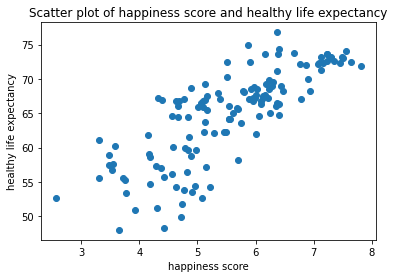

In [24]:
import matplotlib.pyplot as plt

x = merged['happiness_score']
y = merged['healthy_life_expectancy']

plt.scatter(x, y)
plt.title('Scatter plot of happiness score and healthy life expectancy')
plt.xlabel('happiness score')
plt.ylabel('healthy life expectancy')
plt.show()

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.